<a href="https://www.kaggle.com/code/ciscoyslas/mlprojectbaselinemodel?scriptVersionId=152447410" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)

This notebook is intended to serve as a template to complete Part 1 of the projects. Feel free to modify this notebook as needed, but be sure to have the two main parts, a) a introductory proposal section describing what it is your doing to do and where the dataset originates, and b) an exploratory analysis section that has the histograms, charts, tables, etc. that are the output from your exploratory analysis. 

__Note you will want to remove the text above, and in the markdown cells below, and replace it with your own text describing the dataset, task, exploratory steps, etc.__

## 1. Introduction/Background

_In this section you will describe (in English) the dataset you are using as well as the NLP problem it deals with. For example, if you are planning to use the Twitter Natural Disaster dataset, then you will describe what the data and where it came as if you were explaining it to someone who does not know anything about the data. You will then describe how this is a __text classification__ problem, and that the labels are binary (e.g. a tweet either refers to a genuine/real natural disaster, or it does not)._ 

_Overall, this should be about a paragraph of text that could be read by someone outside of our class, and they could still understand what it is your project is doing._ 

_Note that you should __not__ simply write one sentence stating, "This project is base on the Kaggle competition: Predicting Natural Disasters with Twitter._"

_If you are still looking for datasets to use, consider the following resources to explore text datasets._

* https://huggingface.co/datasets/
* https://www.kaggle.com/datasets
* https://data-flair.training/blogs/machine-learning-datasets/ 
* https://pytorch.org/text/stable/datasets.html
* https://github.com/niderhoff/nlp-datasets 
* https://medium.com/@ODSC/20-open-datasets-for-natural-language-processing-538fbfaf8e38 
* https://imerit.net/blog/25-best-nlp-datasets-for-machine-learning-all-pbm/ 


_If you instead are planning to do a more research-oriented or applied type of project, then describe what it is that you plan to do._

_If it is research, then what do you want to understand/explain better?_

_If it is applied, then what it is you plan to build?_ 

## 2. Exploratory Data Analysis

_You will now load the dataset and carry out some exploratory data analysis steps to better understand what text data looks like. See the examples from class on 10/. The following links provide some good resources of exploratory analyses of text data with Python._


* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/craft-cans/breweries.csv
/kaggle/input/craft-cans/beers.csv


In [2]:
#Load the dataset
beers_df = pd.read_csv('/kaggle/input/craft-cans/beers.csv')


In [3]:
#Selecting features (X) and target variable (y)
X = beers_df[['ibu', 'id', 'brewery_id', 'ounces']]
y = beers_df['abv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
#Drop columns with missing values
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

X_test.dropna(inplace=True)
y_test = y_test[X_test.index]

In [5]:
#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
#Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9.647766598639454e-05


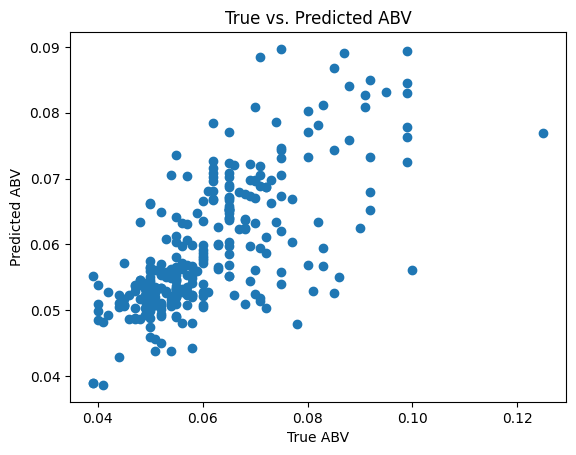

In [7]:
#Scatter plot of predicted vs. true values
plt.scatter(y_test, y_pred)
plt.xlabel('True ABV')
plt.ylabel('Predicted ABV')
plt.title('True vs. Predicted ABV')
plt.show()

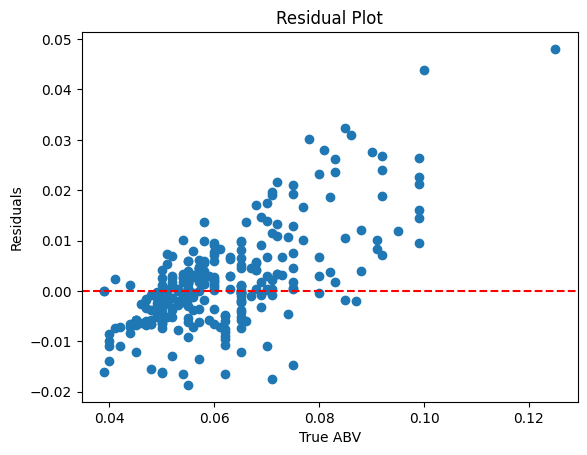

In [8]:
#Residual plot
residuals = y_test- y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('True ABV')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

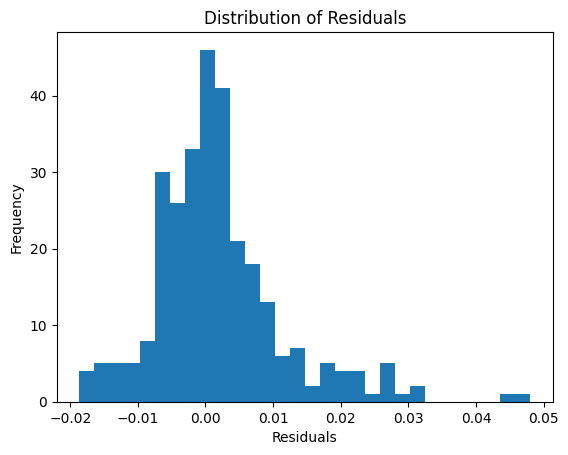

In [9]:
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

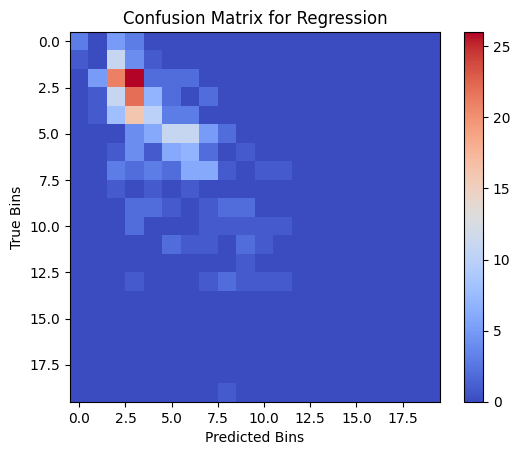

In [10]:
#Binning true and predicted values to create categories
bins = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 20)
true_bins = np.digitize(y_test, bins)
pred_bins = np.digitize(y_pred, bins)

#Count the occurrences in each bin to create a confusion matrix
confusion_matrix = np.zeros((len(bins), len(bins)))

for i in range(len(bins)):
    for j in range(len(bins)):
        confusion_matrix[i, j] = np.sum((true_bins == i + 1) & (pred_bins == j + 1))

#Plot the confusion matrix as a heatmap
plt.imshow(confusion_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Confusion Matrix for Regression')
plt.xlabel('Predicted Bins')
plt.ylabel('True Bins')
plt.colorbar()

plt.show()